In [15]:
import pandas as pd
import numpy as np

import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt 


In [40]:
ga_stats_results_BERT = "ga_results_BERT_STATS.csv"
ga_stats_results_DISTANCE = "ga_results_DISTANCE_STATS.csv"
ga_stats_results_DISTANCE_BERT = "ga_results_DISTANCE_BERT_STATS.csv"

bert_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_BERT)
distance_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_DISTANCE)
bert_distance_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_DISTANCE_BERT)


In [41]:
bert_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is probably the best film...,0.812936,5,0.966937,Y,0.03,1,42
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.398513,8,0.968591,Y,0.03,2,87
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i say that ra...,0.484280,5,0.977343,Y,0.03,1,43
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.672474,4,0.979098,Y,0.01,1,44
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as one of a fivefor deal fro...,0.456993,8,0.959369,Y,0.05,2,84


In [42]:
distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is arguably the meanest f...,0.762060,13,0.934823,Y,0.08,3,97
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.448427,5,0.974665,Y,0.02,1,33
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i tell that r...,0.392656,7,0.970754,Y,0.04,2,59
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.799918,2,0.978627,Y,0.01,1,32
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as somebody of a fivefor dea...,0.463923,9,0.955224,Y,0.06,2,64


# box plots for time taken 

In [43]:
bert_distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is probably the meanest f...,0.768538,20,0.895522,Y,0.13,5,264
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.395876,10,0.966031,Y,0.03,2,107
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying somethings newer when i say tha...,0.426562,10,0.958418,Y,0.05,2,106
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.637239,5,0.978884,Y,0.01,1,53
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as anyone of a fivefor addre...,0.294813,29,0.836257,Y,0.19,5,256


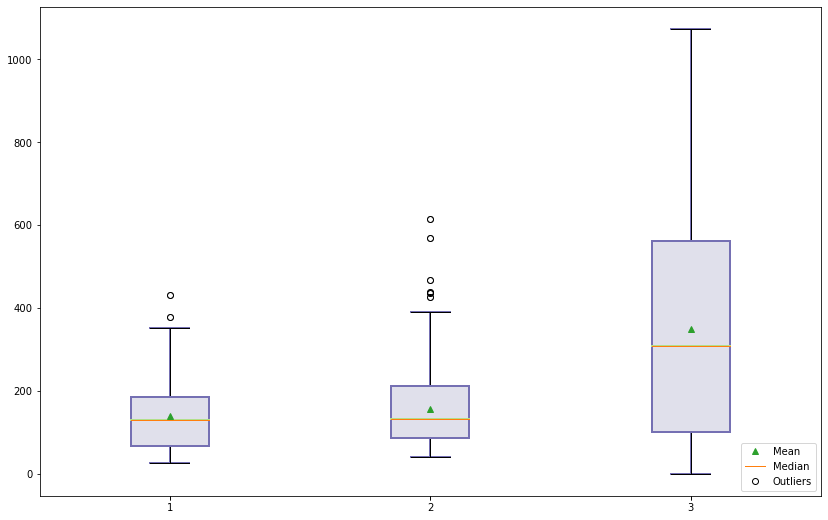

In [48]:

distance_time = distance_stats['ga_time_taken'] # method A
bert_time = bert_stats['ga_time_taken'] # method B
bert_distance_time = bert_distance_stats['ga_time_taken'] # method C

data = [distance_time,bert_time,bert_distance_time] 
  
# Create a figure instance
fig = plt.figure(1, figsize=(14, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
#bp = ax.boxplot(data)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#e0e0eb' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['Method A', 'Method B', 'Method C'])

box_plot = ax.boxplot(data, showmeans=True)
h, labels = ax.get_legend_handles_labels()
h.append(box_plot.get('means')[0])
h.append(box_plot.get('medians')[0])
h.append(box_plot.get('fliers')[0])

labels = ['Mean', 'Median', 'Outliers']
plt.rcParams["legend.loc"] = 'lower right'
plt.legend(h, l)

    
# Save the figure
fig.savefig('ga_attack_results/box-plot-time.png', bbox_inches='tight')
